
# Project: Investigate a Dataset (TMDb Movies Dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I will be using the TMDB movie dataset to complete my Investigate a Dataset project. This dataset was collected from The Movie Database (TMDb) which contains information about ten thousand (10,000) movies.  The dataset consists of twenty-one (21) columns which include information about movie popularity, budget, revenue, genres, release period, and so on. 


### <font color=blue>Research Questions are:</font>

#### 1.	Analysis of the relation between the number of movies and years.
#### 2. Analysis of the number of percentage movies in the top 10 genre
#### 3.	Analysis the top 10 production companies has the highest number of movies
#### 4. Which top 10 movie director has the highest number of movies in the dataset?
#### 5.1. Based on column 'Budget' in the dataset, find out the highest and lowest budget movies details.
#### 5.2 Based on column 'revenue' in the dataset, find out the highest and lowest revenue earn movies details.
#### 5.3 Find out the movie relationship between the 'Budget' and 'Revenue'
#### 6.	Find out over the year if the film industry making a profit? and which year we had the highest number of profitable movies.
#### 7. Find out the average 'Runtime' of movies


In [2]:
# Import all the packages we need in this project

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime

<a id='wrangling'></a>
## Data Wrangling

Here, I will first load the dataset and then explore useful methods to assess and build intuition about the dataset with help of Pandas. After that will go ahead and proceed with the 'Data Cleaning Process' to get the meaningful data that help to identify the question's answer. 

### General Properties

### Read the TMDb Movies Dataset

In [3]:
# Reading a dataset in the CSV file and storing the same in the Pandas dataframe variable df
df = pd.read_csv(r"D:\Udacity Project Dataset\tmdb-movies.csv")

# Print the first five rows of the dataset
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [4]:
# Check dimensions of the dataset
df.shape

(10866, 21)

In [5]:
# Let's check statistics of the data
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
# Let's find a dataframe summary
# Which includes datatype for columns, number of columns, and missing (null) values for columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [7]:
# Find some duplicates data in the dataset
sum(df.duplicated())

1

### <font color=brown>Observations from the dataset</font>
* In the dataset, a unit of currency has not been mentioned for the column name like Budget, Revenue, Budget_adj, Revenue_adj. Hence, for my project analysis, I will be considered USD
* As per the dataset found that information provided in the "vote_count" column is different for all the movies. So based on that "vote_average" column will be affected.


## Data Cleaning (Perform all the below steps for cleaning)

**<font color=darkblue>Need to prformed following data cleaning process based on Data Wrangling code observation:</font>**

1. Drop (delete) unrelevent columns such as 'id', 'imdb_id', 'popularity', 'homepage', 'tageline', 'keywords', 'overview', 'vote_count', 'vote_average', 'budget_adj', and 'revenue_adj'.
2. Covert 'release_date' column datatype from String to data format
3. Delete the duplicated row which we have in our dataset.
4. Replace the value of 0 to NAN in the 'runtime' column 
5. As per observation, there are a lot of records that have 0 value in the 'budget' and 'revenue' columns. I will convert those values from 0 to NAN and drop them to calculate the correct profit values.

### <font color=purple>1.	Deleting unrelevent columns from the dataset</font>

In [8]:
# Remove a list of below columns
del_col = [ 'id', 'imdb_id', 'popularity', 'homepage', 'tagline', 'keywords', 'overview', 'vote_count', 'vote_average', 'budget_adj','revenue_adj']

#Drop the columns from the database
df.drop(del_col,axis=1,inplace=True)

# Let's check the new dataset
df.head()

,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2015


### <font color=purple>2.	Covert 'release_date' column datatype from String to data format</font>

In [9]:
#Convert column 'release_date' datatype into DateTime
df.release_date = pd.to_datetime(df['release_date'])

# Check the new datatype for 'release_date' column
df.head()

,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2015


### <font color=purple>3.	Delete the duplicated row which we have in our dataset.</font>

In [10]:
# Drop duplicate rows
df.drop_duplicates(keep = 'first', inplace = True)

# Using shape function store rows and columns values.
rows, col = df.shape

print('In the new dataset now we have {} total rows and {} columns.'.format(rows-1, col))

In the new dataset now we have 10864 total rows and 10 columns.


### <font color=purple>4.	Replace value of 0 to NAN in the 'runtime' column</font>

In [11]:
#Replacing 'runtime' column value 0 with NAN in the dataset
df['runtime'] = df['runtime'].replace(0, np.NAN)

# Let's check the statistics of dataset
df.describe()

,budget,revenue,runtime,release_year
count,1.086500e+04,1.086500e+04,10834.000000,10865.000000
mean,1.462429e+07,3.982690e+07,102.363855,2001.321859
std,3.091428e+07,1.170083e+08,30.948225,12.813260
min,0.000000e+00,0.000000e+00,2.000000,1960.000000
25%,0.000000e+00,0.000000e+00,90.000000,1995.000000
50%,0.000000e+00,0.000000e+00,99.000000,2006.000000
75%,1.500000e+07,2.400000e+07,112.000000,2011.000000
max,4.250000e+08,2.781506e+09,900.000000,2015.000000


### <font color=purple>5.	As per observation, there are a lot of records that have 0 value in the 'budget' and 'revenue' columns. I will convert those values from 0 to NAN and drop them to calculate the correct profit values.</font>

In [12]:
# Create list of columns that need to be checked.
tmdb_col_list = ['budget', 'revenue']

# Now replace value 0 with NAN in the list
df[tmdb_col_list] = df[tmdb_col_list].replace(0, np.NaN)

# Delete all the rows which contains NAN
df.dropna(subset = tmdb_col_list, inplace = True)

# Using Shape function store row values
rows, col = df.shape

print('Now we have only {} movie records in the dataset.'.format(rows-1))

Now we have only 3853 movie records in the dataset.


### <font color=purple>6.	Change datatype for column 'Budget' and 'Revenue' with INT</font>

In [55]:
# Columns list which need to convert datatype
columns = ['budget', 'revenue']
# Chnage the 'budget' and 'revenue' column datatype with INT
df[columns] = df[columns].applymap(np.int64)
# Find out the new datatype
df.dtypes

budget                           int64
revenue                          int64
original_title                  object
cast                            object
director                        object
runtime                        float64
genres                          object
production_companies            object
release_date            datetime64[ns]
release_year                     int64
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis

We have completed the Data Cleaning process.  Now, will analyze the data and create visualizations to answer the questions mentioned in the introduction section.

### <font color=purple>Research Question 1 (Analysis of the relation between the number of movies and years)</font>
Here, to find out the number of movies first we need to calculate the number of movies in each year by using function value_counts() for the 'release_year' column and then sort the years by using function sort_index().

Text(0.5, 1.0, 'Number of Movies vs Year')

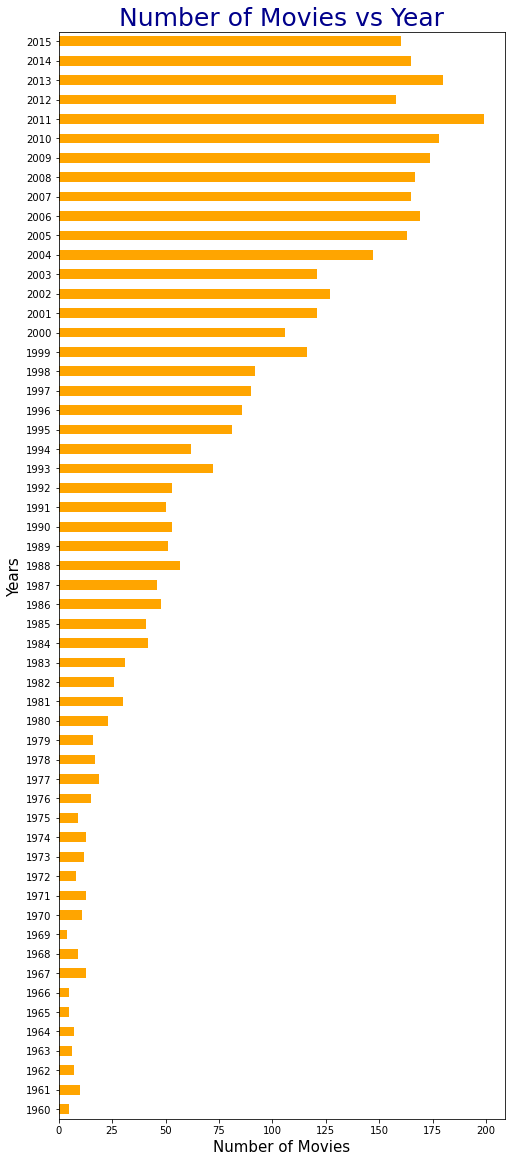

In [13]:
# Calculate the number of movies each year
# After that sort the result
movies_count_year = df["release_year"].value_counts().sort_index()

#Using below data, let's plot the graph
# Let's plot the result between 'release_year' and 'number of movies'
movies_count_year.plot(kind='barh', figsize=(8,20), color='orange')
# x-axis name
plt.xlabel('Number of Movies', fontsize=15)
# y-axis name
plt.ylabel('Years', fontsize=15)
# Name of the chart
plt.title('Number of Movies vs Year', fontsize=25, color='darkblue')

In [51]:
#Year which has highest number of movies
movies_count_year.idxmax()

2011

In [50]:
#Year which has lowest number of movies
movies_count_year.idxmin()

1969

## <font color=green>Conclusion:</font>

<font color=brown>As per the above visualization, found that the number of movies is **increasing** over the years.
* In the year **2011**, the highest number of movies has been released.
* In the year **1969**, the lowest number of movies has been released.</font>

### <font color=purple>Research Question 2 (Analysis of the number of percentage movies in the top 10 genre)</font>
In the dataset we have multiple values in the 'genre' column. So, let's first separate the 'genre' column value and then count the number of movies.

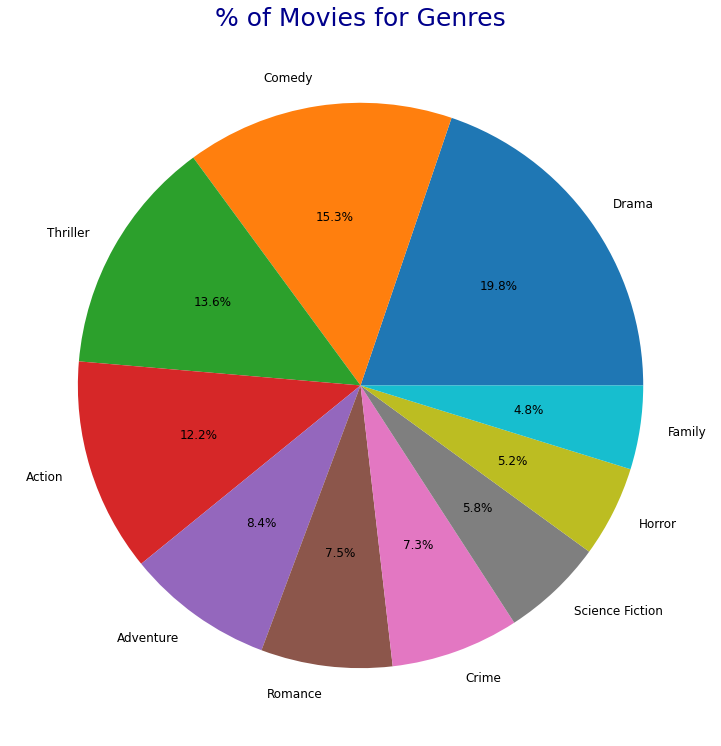

In [21]:
# Separate the data in 'genres' column and count the number of movies in each gener
separate_genrevalue = pd.Series(df['genres'].str.cat(sep = '|').split('|')).value_counts(ascending = False).head(10)
separate_genrevalue

#Using below data, let's plot the graph
# Plot relationship between genre and number of movies in %
separate_genrevalue.plot.pie(figsize=(13,13), fontsize = 12, autopct="%1.1f%%")

#Name of the chart
plt.title('% of Movies for Genres', fontsize=25, color='darkblue')
plt.ylabel('');

# Show the plot
#plt.show()

## <font color=green>Conclusion:</font>

<font color=brown>As per analysis, the **Top 5 Movie Genres** are follows:.
1.	Drama: 19.8%
2.	Comedy: 15.3%
3.	Thriller: 13.6%
4.	Action: 12.2%
5.	Adventure: 8.4%
</font>

### <font color=purple>Research Question 3 (Analysis the top 10 production companies has the highest number of movies)</font>
In the dataset we have multiple values in the 'production_companies' column. So, let's first separate the column value and then count the number of movies for each production company.

Text(0, 0.5, 'Number of Movies')

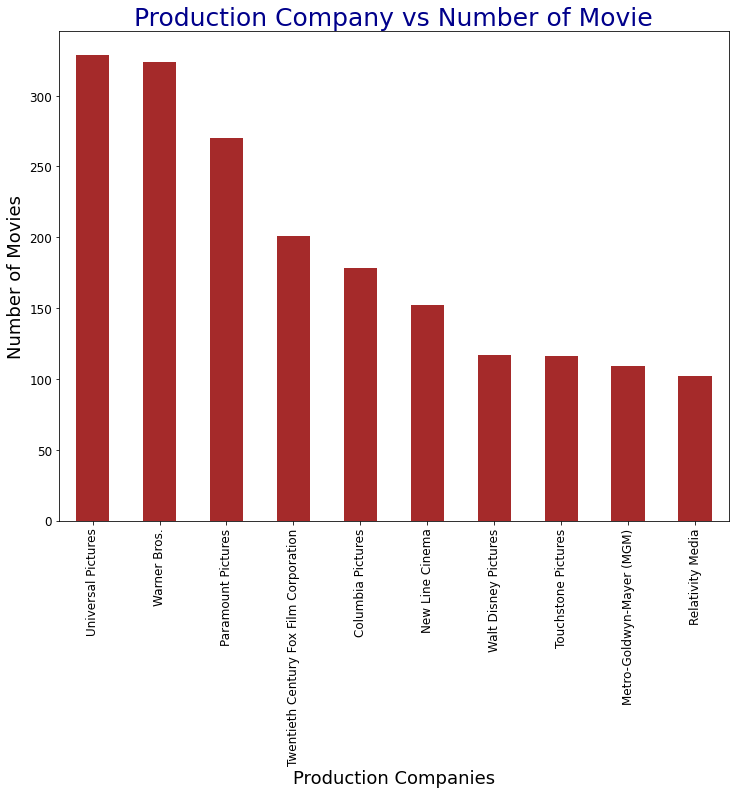

In [37]:
# Separate the data in 'production_companies' column and count the number of movies for each production company
prodcomp_count = pd.Series(df['production_companies'].str.cat(sep = '|').split('|')).value_counts(ascending = False).head(10)
prodcomp_count

#Using below data, let's plot the top 10 highest movie production companies in the graph
# Plot relationship between production companies and number of movies
prodcomp_count.plot.bar(figsize=(12,9), fontsize=12, color='brown')

#Name of the chart
plt.title('Production Company vs Number of Movie', fontsize=25, color='darkblue')

#x-axis and y-axis label
plt.xlabel('Production Companies', fontsize=18)
plt.ylabel('Number of Movies', fontsize=18)


In [41]:
#To find that which production company has the highest number of movies?
prodcomp_count.idxmax()
prodcomp_count.head(2)

Universal Pictures    329
Warner Bros.          324
dtype: int64

## <font color=green>Conclusion:</font>

<font color=brown>1. The production company who has the highest number of movies is **Universal Pictures** by **329 movies**.

2. Next, after Universal Pictures is **Warner Bros.** by **324 movies**</font>

### <font color=purple>Research Question 4 (Which top 10 movie director has the highest number of movies in the dataset?)</font>
In the dataset, we have multiple values in the 'director' column. So, let's first separate the column value and then count the number of movies for each director.

Text(0, 0.5, 'Number of Movies')

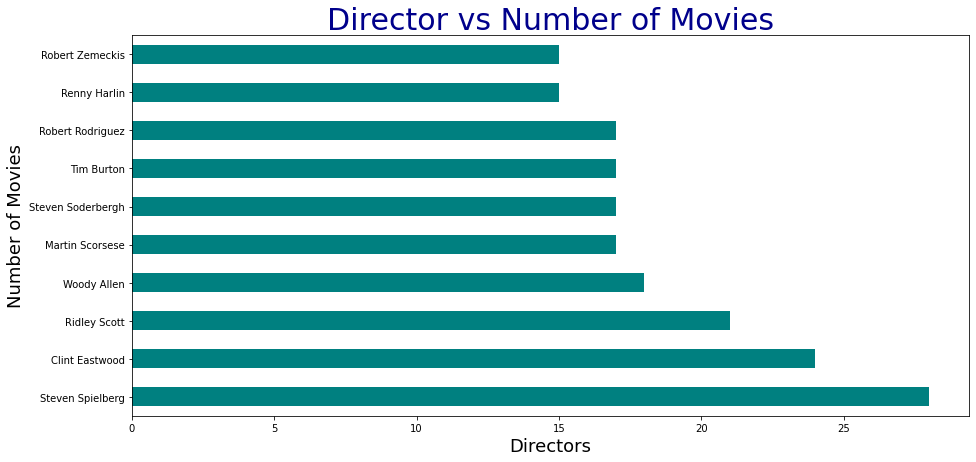

In [23]:
# Separate the data in 'director' column and count the number of movies for each director
director_count = pd.Series(df['director'].str.cat(sep = '|').split('|')).value_counts(ascending = False).head(10)
director_count

#Using below data, let's plot the top 10 highest movie director in the graph
# Plot relationship between director and number of movies
director_count.plot.barh(figsize=(15,7), fontsize=10, color='teal')

#Name of the chart
plt.title('Director vs Number of Movies', fontsize=30, color='darkblue')

#x-axis and y-axis label
plt.xlabel('Directors', fontsize=18)
plt.ylabel('Number of Movies', fontsize=18)

In [127]:
#To find that which movie director made the highest number of movies?
director_count.idxmax()
director_count.head(1)

Steven Spielberg    28
dtype: int64

## <font color=green>Conclusion:</font>

<font color=brown>As per the above visualization, we found that **Steven Spielberg** has directed the highest number of movies in the given dataset.</font>

### <font color=purple>Research Question 5.1 (Based on column 'Budget' in the dataset, find out the highest and lowest budget movies details.)</font>

In [59]:
# Highest budget movie details
df.loc[df['budget'].idxmax()]

budget                                                          425000000
revenue                                                          11087569
original_title                                          The Warrior's Way
cast                    Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director                                                       Sngmoo Lee
runtime                                                               100
genres                          Adventure|Fantasy|Action|Western|Thriller
production_companies                             Boram Entertainment Inc.
release_date                                          2010-12-02 00:00:00
release_year                                                         2010
Name: 2244, dtype: object

In [56]:
# Lowest budget movie details
df.loc[df['budget'].idxmin()]

budget                                                                  1
revenue                                                               100
original_title                                               Lost & Found
cast                    David Spade|Sophie Marceau|Ever Carradine|Step...
director                                                     Jeff Pollack
runtime                                                                95
genres                                                     Comedy|Romance
production_companies             Alcon Entertainment|Dinamo Entertainment
release_date                                          1999-04-23 00:00:00
release_year                                                         1999
Name: 2618, dtype: object

## <font color=green>Conclusion:</font>

<font color=brown>As per the above movies details, we found that; <br> 
   1. The big budget movie is **THE WARRIOR'S WAY** with budget of **425000000 USD** <br>
   2. The less budget movie is **LOST & FOUND** with budget of **1 USD**</font>

### <font color=purple>Research Question 5.2 (Based on column 'revenue' in the dataset, find out the highest and lowest revenue earn movies details.)</font>

In [57]:
# Highest revenue movie details
df.loc[df['revenue'].idxmax()]

budget                                                          237000000
revenue                                                        2781505847
original_title                                                     Avatar
cast                    Sam Worthington|Zoe Saldana|Sigourney Weaver|S...
director                                                    James Cameron
runtime                                                               162
genres                           Action|Adventure|Fantasy|Science Fiction
production_companies    Ingenious Film Partners|Twentieth Century Fox ...
release_date                                          2009-12-10 00:00:00
release_year                                                         2009
Name: 1386, dtype: object

In [58]:
# Highest revenue movie details
df.loc[df['revenue'].idxmin()]

budget                                                            6000000
revenue                                                                 2
original_title                                            Shattered Glass
cast                    Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
director                                                        Billy Ray
runtime                                                                94
genres                                                      Drama|History
production_companies    Lions Gate Films|Cruise/Wagner Productions|Bau...
release_date                                          2003-11-14 00:00:00
release_year                                                         2003
Name: 5067, dtype: object

## <font color=green>Conclusion:</font>

<font color=brown>As per the above movies details, we found that; <br> 
   1. The most revenue earned movies is **AVATAR**<br>
   2. The least revenue earned movie is **SHATTERED GLASS**</font>

### <font color=Orange>Based on the above analysis, let's find out the movie relationship between the 'Budget' and 'Revenue'</font>

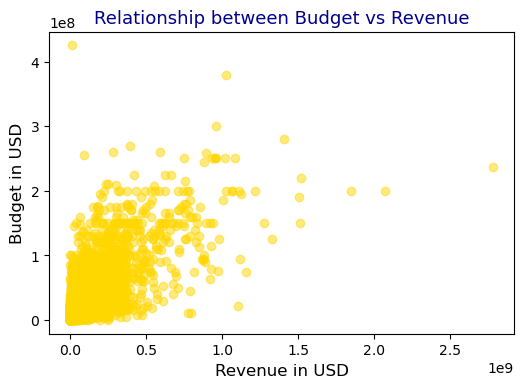

In [113]:
#Using above information, let's plot the data in the graph
# Plot relationship between 'Budget' and 'Revenue'

#Figure size
plt.figure(figsize=(6,4), dpi = 100)

#Name of the histogram
plt.title('Relationship between Budget vs Revenue', fontsize=13, color='darkblue')

#x-axis and y-axis label
plt.xlabel('Revenue in USD', fontsize=12)
plt.ylabel('Budget in USD', fontsize=12)

plt.scatter(df['revenue'], df['budget'], alpha=0.5, color='gold')


## <font color=green>Conclusion:</font>

<font color=brown>Above histogram result show that, most of the movies have upto 50 million dollars revenue.</font>

### <font color=purple>Research Question 6 (Find out over the year if the film industry making a profit? and which year we had the highest number of profitable movies.)</font>

To find out the result for the above question, first we need to calculate the 'Profit' and add profit column in the dataset.

In [93]:
# Calculate the 'Profit', to do that we need to substract the budget from the revenue.
df['profit'] = df['revenue'] - df['budget']
# Lets find out the Profit data in the new dataset
df.head()

,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,release_year,profit
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,2015,1363528810
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,2015,228436354
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2015,185238201
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,2015,1868178225
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2015,1316249360


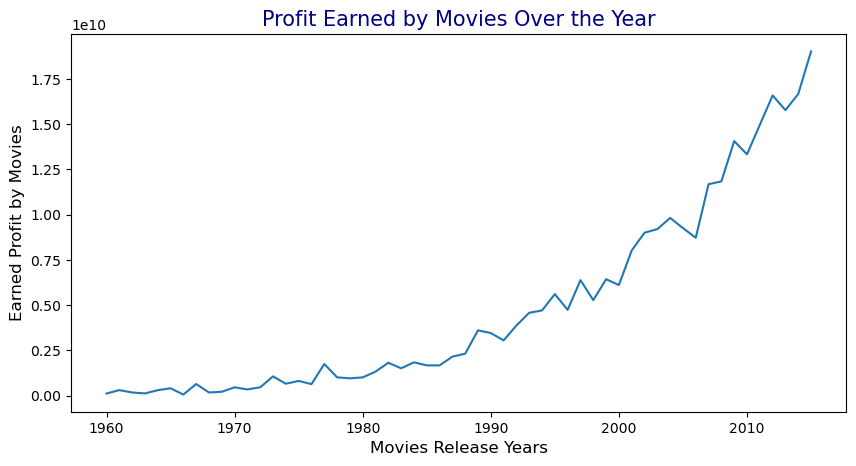

In [125]:
#Here we are trying to find out the movie's profits for every year.
#To do so we have to sum up all the movies profit data of a particular year using 'Group By' function.

year_profit = df.groupby('release_year')['profit'].sum()

#Figure size
plt.figure(figsize=(10,5), dpi = 100)

#x-axis and y-axis label
plt.xlabel('Movies Release Years', fontsize=12)
plt.ylabel('Earned Profit by Movies', fontsize=12)

#Name of the line chart
plt.title('Profit Earned by Movies Over the Year', fontsize=15, color='darkblue')

#plotting the graph
plt.plot(year_profit)

In [121]:
#Find out the highest profit earned year
year_profit.idxmax()

2015

In [122]:
#Find out the lowest profit earned year
year_profit.idxmin()

1966

## <font color=green>Conclusion:</font>

<font color=brown>As per the above visualization; <br> 
   1. The profit is **increasing** each year. That's means over the years film industry is making a profit.<br>
   2. Also, as per the information, we found that in the **year 2015** movies made the **highest** profit.<br>
    However, the **year 1966** has earned the title for the **lowest** profitable movies.</font>

### <font color=purple>Research Question 7 (Find out the average 'Runtime' of movies)</font>

In [129]:
## Average runtime of movies
df['runtime'].mean()

109.22029060716139

(array([1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 3.000e+00, 3.600e+01,
        4.740e+02, 1.065e+03, 8.200e+02, 6.590e+02, 3.950e+02, 2.100e+02,
        7.800e+01, 4.700e+01, 2.400e+01, 1.700e+01, 1.300e+01, 4.000e+00,
        4.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 15.        ,  25.76666667,  36.53333333,  47.3       ,
         58.06666667,  68.83333333,  79.6       ,  90.36666667,
        101.13333333, 111.9       , 122.66666667, 133.43333333,
        144.2       , 154.96666667, 165.73333333, 176.5       ,
        187.26666667, 198.03333333, 208.8       , 219.56666667,
        230.33333333, 241.1       , 251.86666667, 262.63333333,
        273.4       , 284.16666667, 294.93333333, 305.7       ,
        316.46666667, 327.23333333, 338.        ]),
 <BarContainer object of 30 artists>)

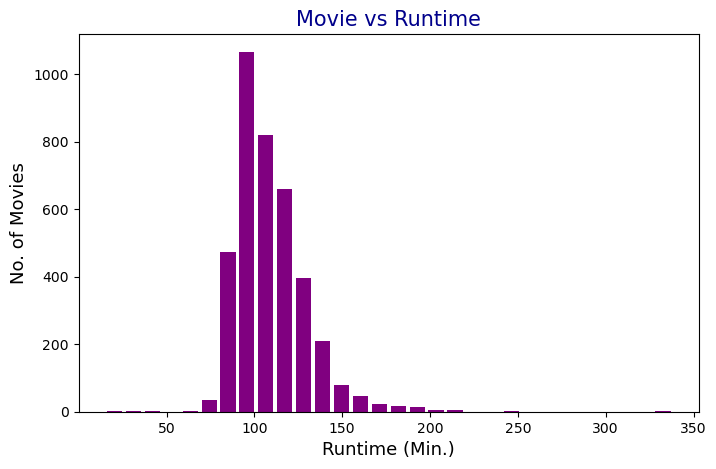

In [147]:
#Histogram of Runtime

#Figure size
plt.figure(figsize=(8,5), dpi = 100)

#x-axis and y-axis label
plt.xlabel('Runtime (Min.)', fontsize=13)
plt.ylabel('No. of Movies', fontsize=13)

#Name of the line chart
plt.title('Movie vs Runtime', fontsize=15, color='darkblue')

#plotting the graph
plt.hist(df['runtime'], rwidth=0.8, bins = 30, color='purple')


## <font color=green>Conclusion:</font>

<font color=brown>
   1. 109.22 minutes is average runtime of movies<br>
   2. Plotted the histogram shows that, the distribution is right-skewed, and most of the movie runtime is between 90 minutes to 130 minutes.</font>

<a id='conclusions'></a>
## Conclusions

#### After analyzing the TMDb dataset and all the observations based on the analysis and visualization, please find the below conclusion:

<font color=green>
1.	Movie production are increasing over the years.<br>
2.	The top 5 'Genres' where the film industry is more focusing are: Drama, Comedy, Thriller, Action, Adventure<br>
3.	The highest number of movies made by 'Universal Pictures' production company<br>
4.	Steven Spielberg, Clint Eastwood, and Ridley Scott are the top 3 directors who directed the highest number of movies in the given time duration<br>
5.	Over the period, the movie industry is changed and it's found a 'Profitable' industry area.<br>
6.	The average runtime duration is 109.22 minutes.<br>
</font>



## <font color=brown>The Observation based on all conclusions are follow:</font>
<font color=blue>
1.	The above analysis was done based on the TMDb movie dataset. However, not sure if the dataset is up to date or has error-free data. Because during the analysis we found that the movie budget was 1 dollar and revenue 2 dollar, which looks like incorrect information.<br>
2.	Deleting the duplicate and missing values have affected the results.<br>
3.	As the 'Budget' and 'Revenue' columns don't have currency units. Also, a lot of records were deleted which appeared value 0 in the dataset. This cleaning process affects the overall analysis.
</font>